In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sns.set_style("whitegrid")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['911.csv'].decode('utf-8')))
df

In [ ]:
df.head()

In [ ]:
df["zip"].value_counts().head()

In [ ]:
df["twp"].value_counts().head()

In [ ]:
df["title"].nunique()

In [ ]:
df["Reason"] = df["title"].apply(lambda title:title.split(":")[0])

In [ ]:
df["Reason"].value_counts()

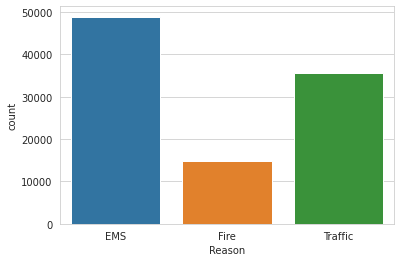

In [ ]:
sns.countplot(x="Reason",data=df)

In [ ]:
type("timeStamp")

str

In [ ]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)

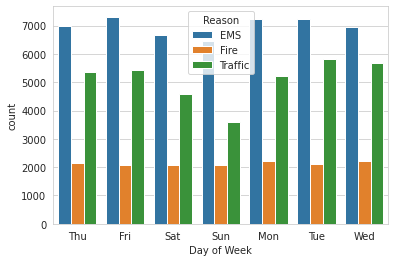

In [ ]:
sns.countplot(x="Day of Week" , data = df , hue="Reason")

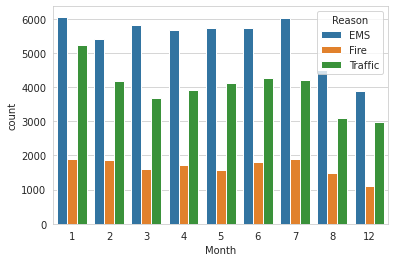

In [ ]:
sns.countplot(x="Month" , data = df , hue="Reason")

In [ ]:
byMonth =df.groupby("Month").count()
byMonth.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


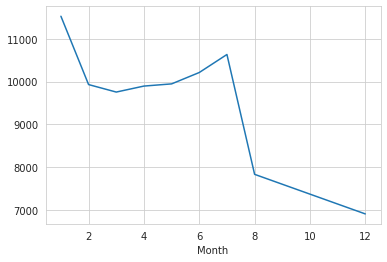

In [ ]:
byMonth["zip"].plot()

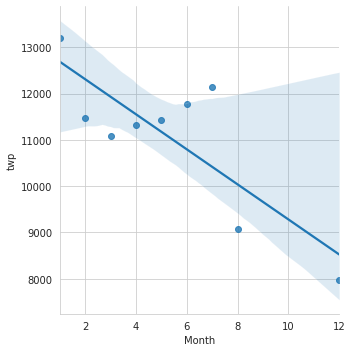

In [ ]:
sns.lmplot(x="Month",y="twp",data = byMonth.reset_index())

In [ ]:
df["Date"]=df["timeStamp"].apply(lambda t:t.date())

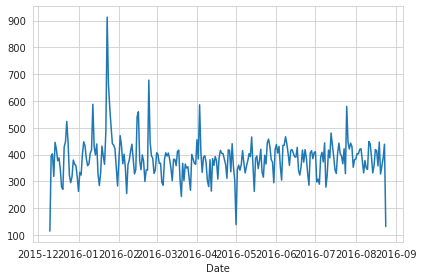

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

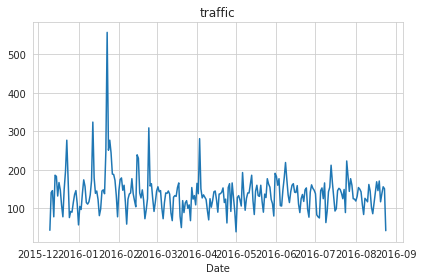

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title("traffic")
plt.tight_layout()

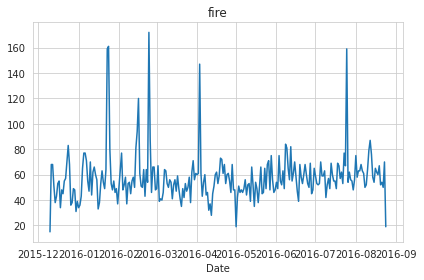

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title("fire")
plt.tight_layout()

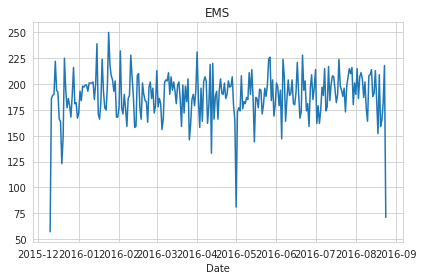

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title("EMS")
plt.tight_layout()

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,803,859,885,890,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,793,822,893,842,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,697,769,801,831,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,643,693,771,679,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,837,773,889,936,876,969,935,1013,810,698,617,553,424,354


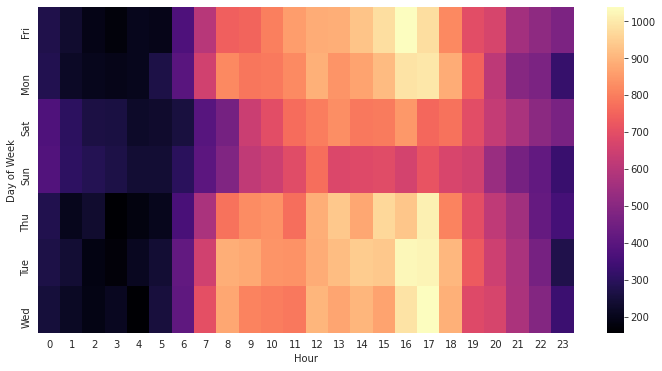

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour , cmap="magma")

<Figure size 864x432 with 0 Axes>

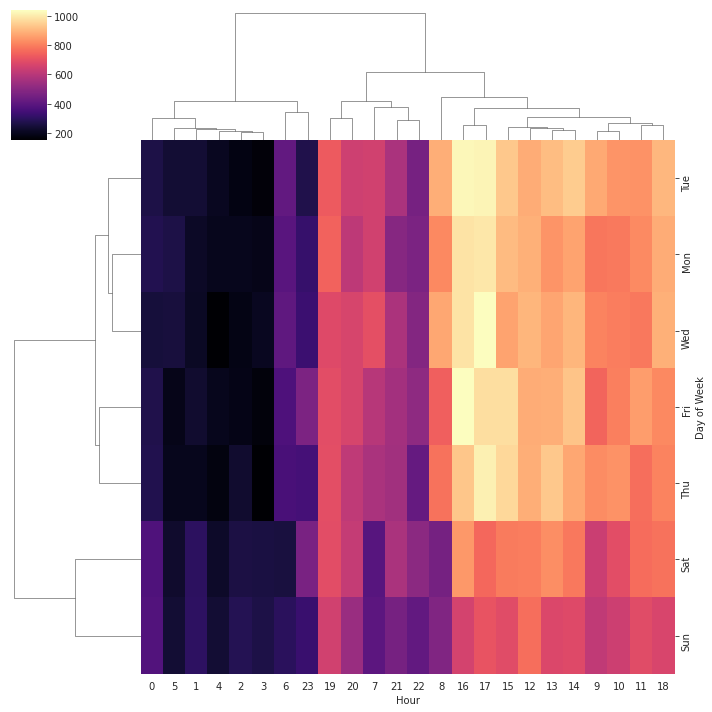

In [ ]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour , cmap="magma")

In [ ]:
daymonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
daymonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


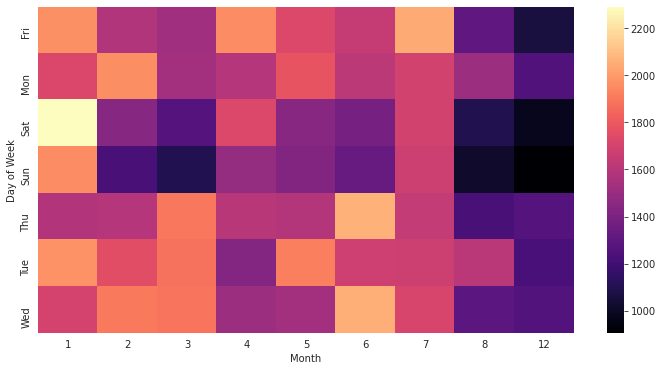

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(daymonth , cmap="magma")

<Figure size 864x432 with 0 Axes>

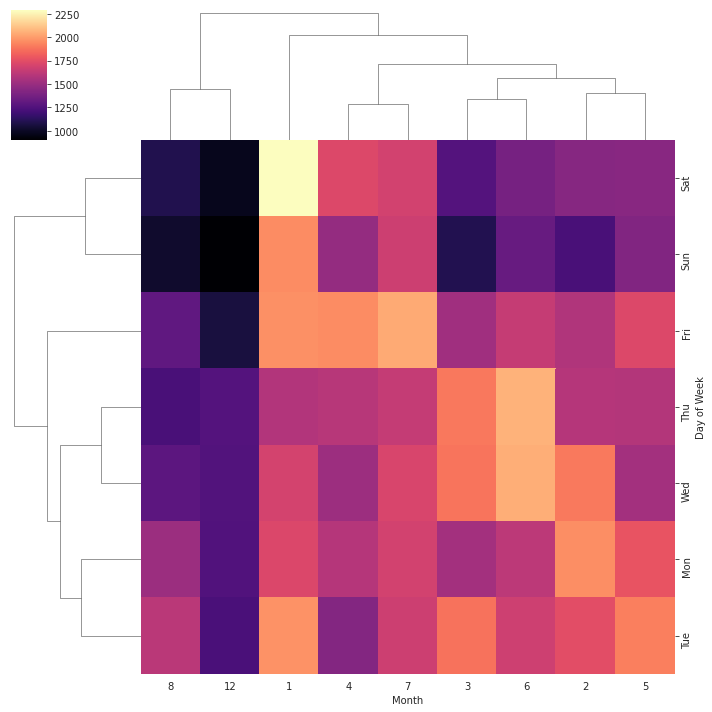

In [ ]:
plt.figure(figsize=(12,6))
sns.clustermap(daymonth , cmap="magma")